In [136]:
# importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")
#sns.set_theme(style="ticks", color_codes=True)


In [137]:
# loading the dataset

train = pd.read_csv("train_dataset.csv")
test = pd.read_csv("test_dataset.csv")

# making duplicate copies of the data

train_df = train.copy()
test_df = test.copy()



In [138]:
# How many features do we have?

cols = train_df.columns.to_list()
print("The number of features we have here is:",len(cols))

The number of features we have here is: 20


In [139]:
# Shape of the both train and test data we have

print("The shape of train data:",train_df.shape)
print("The shape of test data:", test_df.shape)

The shape of train data: (6800, 20)
The shape of test data: (3200, 19)


In [140]:
# First view of the data

train_df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7135,1654,CL,D-penicillamine,19581,F,N,N,Y,N,0.3,279.0,2.96,84.0,1500.8,99.43,109.0,293.0,10.2,4.0
1,7326,41,C,D-penicillamine,22880,F,NaN,N,NaN,N,0.3,NaN,2.96,NaN,1835.4,26.35,131.0,308.0,10.8,1.0
2,7254,297,D,NaN,27957,F,N,N,NaN,N,0.3,328.0,2.64,4.0,NaN,NaN,116.0,194.0,10.3,3.0
3,3135,1872,C,D-penicillamine,21111,F,NaN,Y,Y,N,0.3,302.0,2.02,49.0,NaN,26.35,NaN,NaN,10.5,4.0
4,2483,939,CL,D-penicillamine,18061,F,NaN,NaN,NaN,N,0.5,344.0,3.11,91.0,NaN,104.56,NaN,306.0,11.4,2.0


1) **ID:** Unique Identifier

2) **N_Days:** number of days between registration and the earlier of death, transplantation, or study analysis time.

3) **Status:** status of the patient C (censored), CL (censored due to liver tx), or D (death)

4) **Drug:** type of the drug. D-penicillamine or placebo

5) **Age:** age in [days]

6) **Sex:** M (male) or F (female)

7) **Ascites:** presence of ascites N (No) or Y (Yes). Abdominal swelling caused by accumulation of fluid, most often related to liver disease.

8) **Hepatomegaly:** The presence of hepatomegaly N (No) or Y (Yes). An enlarged liver.

9) **Spiders:** The presence of spiders N (No) or Y (Yes). Spider nevus commonly occurs when you have a lot of estrogen in your system, as is the case with chronic liver disease or during pregnancy. Spider nevus is more common in people with alcohol-related liver cirrhosis (liver disease) than in those with cirrhosis not related to alcohol.

10) **Edema:** the presence of edema N (no edema and no diuretic therapy for edema), S (edema present without diuretics, or edema resolved by diuretics), or Y (edema despite diuretic therapy). Edema is swelling caused by excess fluid trapped in your body's tissues

11) **Bilirubin:** serum bilirubin in [mg/dl]. Bilirubin (bil-ih-ROO-bin) is a yellowish pigment that is made during the normal breakdown of red blood cells. Bilirubin passes through the liver and is eventually excreted out of the body. Higher than normal levels of bilirubin may indicate different types of liver or bile duct problems

12) **Cholesterol:** serum cholesterol in [mg/dl]

13) **Albumin:** albumin in [gm/dl] Albumin is a protein made by your liver. Albumin helps keep fluid in your bloodstream so it doesn't leak into other tissues. It is also carries various substances throughout your body, including hormones, vitamins, and enzymes. Low albumin levels can indicate a problem with your liver or kidneys.

14) **Copper:** urine copper in [ug/day]

15) **Alk_Phos:** alkaline phosphatase in [U/liter]

16) **SGOT:** SGOT in [U/ml].  Serum glutamic oxaloacetic transaminase, an enzyme that is normally present in liver and heart cells. SGOT is released into blood when the liver or heart is damaged

17) **Triglycerides:** triglicerides in [mg/dl]

18) **Platelets:** platelets per cubic [ml/1000]

19) **Prothrombin:** prothrombin time in seconds [s]

20) **Stage:** histologic stage of disease (1, 2, 3, or 4)

In [141]:
# What are the features we have?

print("The features we have are:\n\n",train_df.columns.to_list())

The features we have are:

 ['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']


- Stage is our target or dependent variable which we need to predict

### **Data Preprocessing**

In [142]:
# No of categorical features and numerical features we have

def cols_type(df):
    
    numeric_cols = df.select_dtypes("number").columns.to_list()
    cat_cols = df.select_dtypes("object").columns.to_list()
    print("There are",len(numeric_cols),"numeric columns:\n",numeric_cols)
    print("\n There are", len(cat_cols),"categorical columns:\n", cat_cols)
    print("\n")

print("Train Data:")
cols_type(train_df)
print("Test Data")
cols_type(test_df)

Train Data:
There are 13 numeric columns:
 ['ID', 'N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']

 There are 7 categorical columns:
 ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']


Test Data
There are 12 numeric columns:
 ['ID', 'N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']

 There are 7 categorical columns:
 ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']




In [143]:
# Checking for missing values

print("The percentage of missing values in train data\n\n", round(train_df.isna().sum()*100/train_df.shape[0],2))
print("\nThe percentage of missing values in test data\n\n", round(test_df.isna().sum()*100/test_df.shape[0], 2))



The percentage of missing values in train data

 ID                0.00
N_Days            0.00
Status            0.00
Drug             29.78
Age               0.00
Sex               0.00
Ascites          33.03
Hepatomegaly     35.69
Spiders          38.09
Edema             0.00
Bilirubin         0.00
Cholesterol      45.60
Albumin           0.00
Copper           31.71
Alk_Phos         36.74
SGOT             30.91
Tryglicerides    41.35
Platelets         4.97
Prothrombin       2.28
Stage             0.00
dtype: float64

The percentage of missing values in test data

 ID                0.00
N_Days            0.00
Status            0.00
Drug             30.09
Age               0.00
Sex               0.00
Ascites          33.97
Hepatomegaly     34.44
Spiders          37.50
Edema             0.00
Bilirubin         0.00
Cholesterol      44.84
Albumin           0.00
Copper           31.44
Alk_Phos         36.50
SGOT             30.84
Tryglicerides    40.19
Platelets         5.12
Prothrombin  

- There are a lot of missing values here. So we have to analyse each of the columns one by one before imputing as to whether the values dont exist or it wasnt recorded

#### Prothrombin and Platelets
- Platelets - Platelets count in a human body cant be zero at all, so we will replace the missing values with the median.
- Prothrombin - Its a test to evaluate blood clotting. Prothrombin is a protein found in liver. The possible reason for nan's in this column can be people didnt take the test and so the values do not exist. We will drop the values instead of replacing it.
- Also after treating the missing values we will compare the distributions to check if the distribution doesnt change drastically before and after imputation

In [144]:
# Keeping aside original values

platelets = train_df[["Platelets","Stage"]].copy()
prothrombin = train_df[["Prothrombin","Stage"]].copy()
temp = train_df[["Platelets","Prothrombin","Stage"]].copy()

In [145]:
temp = train_df.copy()

In [146]:
# Replacing the nulls in Platelets with median and Dropping nulls in Prothrombin

temp["Platelets"].fillna(temp["Platelets"].median(), inplace = True)
temp.dropna(subset = ["Prothrombin"], inplace = True)

In [147]:
temp.isna().sum()

ID                  0
N_Days              0
Status              0
Drug             1981
Age                 0
Sex                 0
Ascites          2203
Hepatomegaly     2371
Spiders          2534
Edema               0
Bilirubin           0
Cholesterol      3030
Albumin             0
Copper           2108
Alk_Phos         2433
SGOT             2056
Tryglicerides    2747
Platelets           0
Prothrombin         0
Stage               0
dtype: int64

<AxesSubplot:ylabel='Density'>

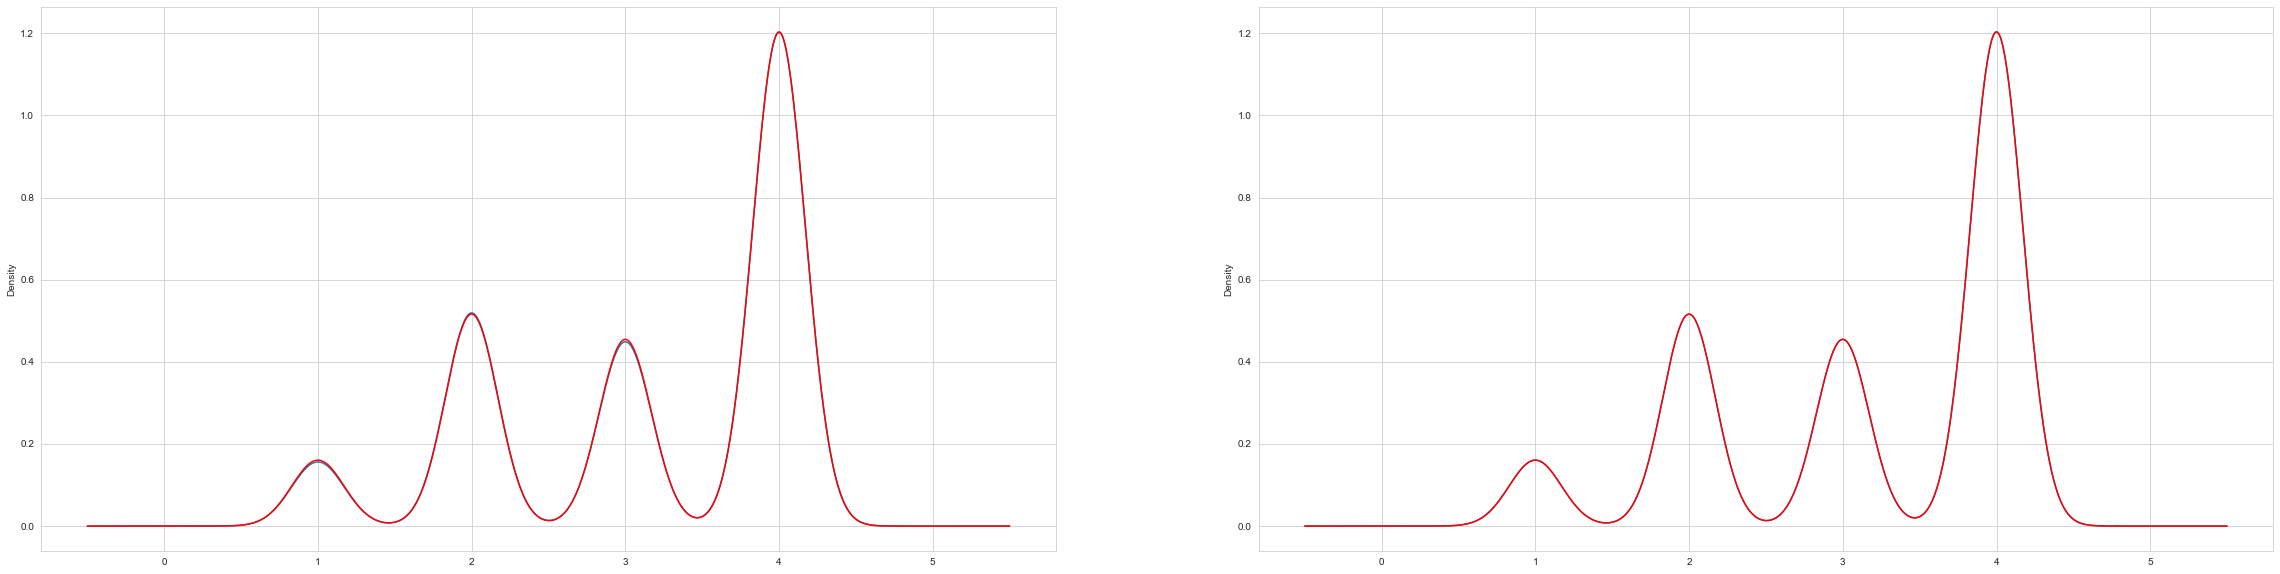

In [148]:
# Comparing distributions before and after handling missing values


fig = plt.figure(figsize=(40,10))
ax = fig.add_subplot(121)
platelets[platelets["Platelets"].notnull()]["Stage"].plot(kind = "kde", ax = ax)
temp[temp["Platelets"] >= 0]["Stage"].plot(kind = "kde", ax = ax, color = "red")

ax1 = fig.add_subplot(122)
prothrombin[prothrombin["Prothrombin"].notnull()]["Stage"].plot(kind = "kde", ax = ax1)
temp[temp["Prothrombin"] >= 0]["Stage"].plot(kind = "kde", ax = ax1, color = "red")

* The distributions of both platelets and prothrombin before and after handling missing values remains same. It does not change much with our target column "Stage". So we will apply this on our train as well as test data

In [149]:
# Removing missing values in platelets and prothrombin from train and test data

train_df["Platelets"].fillna(train_df["Platelets"].median(), inplace = True)
train_df.dropna(subset = ["Prothrombin"], inplace = True)
test_df["Platelets"].fillna(test_df["Platelets"].median(), inplace = True)
test_df.dropna(subset = ["Prothrombin"], inplace = True)



In [150]:
# Seeing the train data

train_df["Drug"].value_counts()

D-penicillamine    2382
Placebo            2282
Name: Drug, dtype: int64

In [151]:
train_df["Drug"].isna().sum()*100/train_df["Drug"].shape[0]

29.81188863807374

### Drug
* Drug administered to the patients are either D-penicillamine or placebo. But there are **~30%** of the values missing in drug.
* There can be two reasons for the imissing values:
   - Drug was not administered to those patients
   - Drug was given but not recorded
* I am thinking of creating a new category "missing" for missing values and then check the distribution if it distorts or not. If not we will impute it in the train dataste as well as test dataset

In [152]:
# Lets keep the original values aside

drug = train_df[["Drug","Stage"]].copy()
temp = train_df.copy()

In [153]:
# Lets impute the missing values by creating a new category

temp["Drug"].fillna("Missing", inplace = True)

<AxesSubplot:ylabel='Density'>

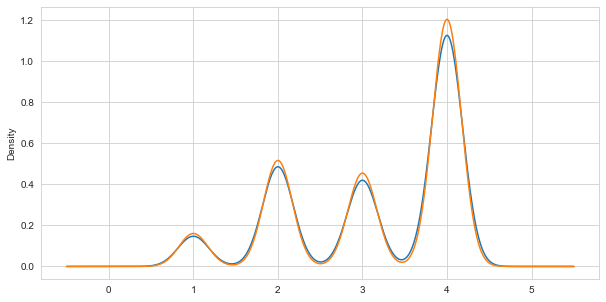

In [154]:
# Lets check the distributions with Stage before and after handling missing values in Drug column

fig = plt.figure(figsize=(10,5))
ax = plt.subplot(111)

drug[drug["Drug"].notnull()]["Stage"].plot(kind = "kde", ax = ax)
temp[temp["Drug"].notnull()]["Stage"].plot(kind = "kde", ax = ax)

- Both the distribution before and after handling missing values is not that much distorted. So I am thinking of incorporating this into both of my training and testing data

In [155]:
# Handling missing values in our training and test data

train_df["Drug"].fillna("Missing", inplace = True)
test_df["Drug"].fillna("Missing", inplace = True)

### **Ascites, Hepatomegaly, Spiders**
- Ascites are accumulation of fluid
- Hepatomegaly is the condition of an enlarged liver
- Spiders happen when you have a lot of estrogen in your system and you have liver desease

In [156]:
# CHecking the type of values we have in Ascites, Hepatomegaly and in Spiders

print(train_df["Ascites"].value_counts())
print(train_df["Hepatomegaly"].value_counts())
print(train_df["Spiders"].value_counts())

N    3877
Y     565
Name: Ascites, dtype: int64
N    2500
Y    1774
Name: Hepatomegaly, dtype: int64
N    2842
Y    1269
Name: Spiders, dtype: int64


In [157]:
print("Missing values in Ascites:",round(train_df["Ascites"].isna().sum()*100/train_df["Ascites"].shape[0],2))
print("Missing values in Hepatomegaly:",round(train_df["Hepatomegaly"].isna().sum()*100/train_df["Hepatomegaly"].shape[0],2))
print("Missing values in Spiders:",round(train_df["Spiders"].isna().sum()*100/train_df["Spiders"].shape[0],2))

Missing values in Ascites: 33.15
Missing values in Hepatomegaly: 35.68
Missing values in Spiders: 38.13


- We have either a No or Yes in all of these columns.
- Since the missing values in our columns are more than **30%**, so we it would be bad to impute the missing values with the value which occurs the highest ie the mode of these columns
- Lets create a new category "Missing" here in all of these columns and check their distributions before and after handling missing values


In [158]:
# Keeping the original values aside

ascites = train_df[["Ascites", "Stage"]].copy()
hepatomegaly = train_df[["Hepatomegaly","Stage"]].copy()
spiders = train_df[["Spiders","Stage"]].copy()

temp = train_df.copy()

In [159]:
# imputing the values in our temporary dataset

temp["Ascites"].fillna("Missing", inplace = True)
temp["Hepatomegaly"].fillna("Missing", inplace = True)
temp["Spiders"].fillna("Missing", inplace = True)

<AxesSubplot:ylabel='Density'>

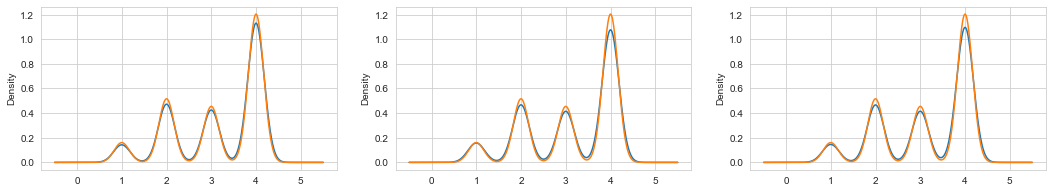

In [160]:
# Lets compare the distributions before and after handling missing values

fig = plt.figure(figsize = (18,3))
ax = plt.subplot(131)
ascites[ascites["Ascites"].notnull()]["Stage"].plot(kind = "kde", ax = ax)
temp[temp["Ascites"].notnull()]["Stage"].plot(kind = "kde", ax = ax)


ax1 = plt.subplot(132)
hepatomegaly[hepatomegaly["Hepatomegaly"].notnull()]["Stage"].plot(kind = "kde", ax = ax1)
temp[temp["Hepatomegaly"].notnull()]["Stage"].plot(kind = "kde", ax = ax1 )


ax2 = plt.subplot(133)
spiders[spiders["Spiders"].notnull()]["Stage"].plot(kind = "kde", ax = ax2)
temp[temp["Spiders"].notnull()]["Stage"].plot(kind = "kde", ax = ax2)

- The graphs does not look that much distorted. So I will incorporate this in our train as well as in our test dataset


In [161]:
# Imputing missing values in ascites, hepatomegaly and spiders in train and test data

train_df["Ascites"].fillna("Missing",inplace = True)
train_df["Hepatomegaly"].fillna("Missing", inplace = True)
train_df["Spiders"].fillna("Missing", inplace = True)

In [162]:
# Imputing missing values in ascites, hepatomegaly and spiders in train and test data

test_df["Ascites"].fillna("Missing",inplace = True)
test_df["Hepatomegaly"].fillna("Missing", inplace = True)
test_df["Spiders"].fillna("Missing", inplace = True)

In [163]:
# Checking if the changes took place 

train_df.isna().sum()


ID                  0
N_Days              0
Status              0
Drug                0
Age                 0
Sex                 0
Ascites             0
Hepatomegaly        0
Spiders             0
Edema               0
Bilirubin           0
Cholesterol      3030
Albumin             0
Copper           2108
Alk_Phos         2433
SGOT             2056
Tryglicerides    2747
Platelets           0
Prothrombin         0
Stage               0
dtype: int64

In [164]:
test_df.isna().sum()

ID                  0
N_Days              0
Status              0
Drug                0
Age                 0
Sex                 0
Ascites             0
Hepatomegaly        0
Spiders             0
Edema               0
Bilirubin           0
Cholesterol      1407
Albumin             0
Copper            984
Alk_Phos         1138
SGOT              970
Tryglicerides    1256
Platelets           0
Prothrombin         0
dtype: int64

### **Cholesterol, Copper, Alk_phos, Tryglicerides**

In [165]:
# Checking what type of values we have here in these columns

train_df[["Cholesterol","Copper","Alk_Phos","Tryglicerides"]].dtypes

Cholesterol      float64
Copper           float64
Alk_Phos         float64
Tryglicerides    float64
dtype: object

In [166]:
print("Missing values in cholesterol :", round(train_df["Cholesterol"].isna().sum()*100/train_df["Cholesterol"].shape[0],2))
print("Missing values in copper :", round(train_df["Copper"].isna().sum()*100/train_df["Copper"].shape[0],2))
print("Missing values in alk_phos :", round(train_df["Alk_Phos"].isna().sum()*100/train_df["Alk_Phos"].shape[0],2))
print("Missing values in tryglicerides :", round(train_df["Tryglicerides"].isna().sum()*100/train_df["Tryglicerides"].shape[0],2))

Missing values in cholesterol : 45.6
Missing values in copper : 31.72
Missing values in alk_phos : 36.61
Missing values in tryglicerides : 41.34


- We have continuous values in all of these columns
- Cholesterol, Copper, Alk_phos, tryglicerides are such components in human bodies which are never equal to zero or never missing. 
- Missing values in all of these columns are more than 30%. The reason might be they werent examined. And even if they were examined they were not noted. In either way missing values are not because they dont exist
- Since missing values are more than 5%, lets relace the missing values with median and compare the distirbutions

In [167]:
# Keeping aside the original values

org_df = train_df.copy()
temp = train_df.copy()

In [168]:
# Lets impute the missing values in temp

temp["Cholesterol"].fillna(temp["Cholesterol"].median(), inplace = True)
temp["Copper"].fillna(temp["Copper"].median(), inplace = True)
temp["Alk_Phos"].fillna(temp["Alk_Phos"].median(), inplace = True)
temp["Tryglicerides"].fillna(temp["Tryglicerides"].median(), inplace = True)


<AxesSubplot:ylabel='Density'>

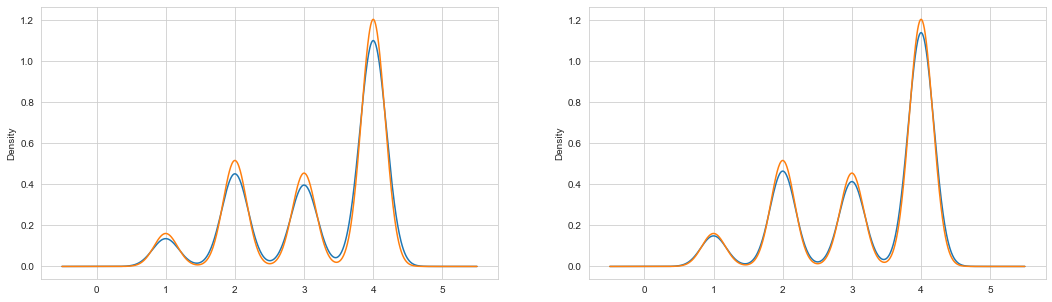

In [169]:
# Comparing the distributions

fig = plt.figure(figsize=(18,5))
ax = plt.subplot(121)
org_df[org_df["Cholesterol"].notnull()]["Stage"].plot(kind = "kde", ax = ax)
temp[temp["Cholesterol"].notnull()]["Stage"].plot(kind = "kde", ax = ax)

ax1 = plt.subplot(122)
org_df[org_df["Copper"].notnull()]["Stage"].plot(kind = "kde", ax = ax1)
temp[temp["Copper"].notnull()]["Stage"].plot(kind = "kde", ax = ax1)


<AxesSubplot:ylabel='Density'>

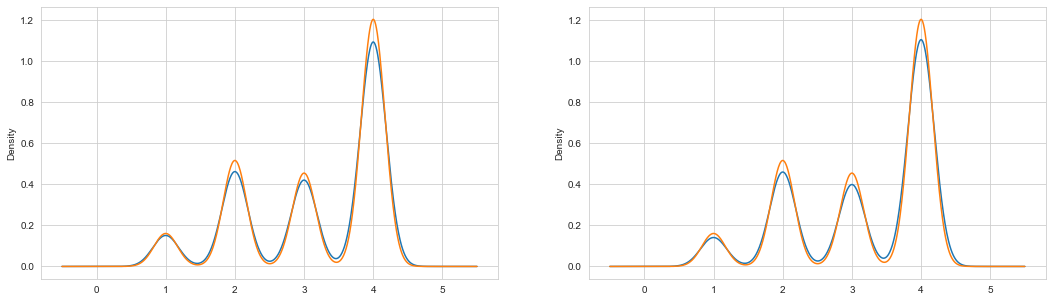

In [170]:
# Comparing the distributions

fig = plt.figure(figsize=(18,5))
ax = plt.subplot(121)
org_df[org_df["Alk_Phos"].notnull()]["Stage"].plot(kind = "kde", ax = ax)
temp[temp["Alk_Phos"].notnull()]["Stage"].plot(kind = "kde", ax = ax)

ax1 = plt.subplot(122)
org_df[org_df["Tryglicerides"].notnull()]["Stage"].plot(kind = "kde", ax = ax1)
temp[temp["Tryglicerides"].notnull()]["Stage"].plot(kind = "kde", ax = ax1)


- Since all of the graphs are not that much distorted, lets impute all the misisng values with median in these columns in both train and test dataset

In [171]:
# Imputing the values in train and test data

train_df["Cholesterol"].fillna(train_df["Cholesterol"].median(), inplace = True)
train_df["Copper"].fillna(train_df["Copper"].median(), inplace = True)
train_df["Alk_Phos"].fillna(train_df["Alk_Phos"].median(), inplace = True)
train_df["Tryglicerides"].fillna(train_df["Tryglicerides"].median(), inplace = True)



In [172]:
# Imputing the values in train and test data

test_df["Cholesterol"].fillna(test_df["Cholesterol"].median(), inplace = True)
test_df["Copper"].fillna(test_df["Copper"].median(), inplace = True)
test_df["Alk_Phos"].fillna(test_df["Alk_Phos"].median(), inplace = True)
test_df["Tryglicerides"].fillna(test_df["Tryglicerides"].median(), inplace = True)



In [173]:
# Checking if the chnages took place or not

train_df.isna().sum()

ID                  0
N_Days              0
Status              0
Drug                0
Age                 0
Sex                 0
Ascites             0
Hepatomegaly        0
Spiders             0
Edema               0
Bilirubin           0
Cholesterol         0
Albumin             0
Copper              0
Alk_Phos            0
SGOT             2056
Tryglicerides       0
Platelets           0
Prothrombin         0
Stage               0
dtype: int64

### **SGOT**

In [174]:
# Checking the type of values we have in SGOT

train_df["SGOT"].value_counts()

26.35     853
104.70      6
105.08      4
101.60      4
104.38      4
         ... 
129.89      1
123.64      1
30.73       1
100.59      1
72.95       1
Name: SGOT, Length: 3070, dtype: int64

In [175]:
print("The missing values in SGOT are:", round(train_df["SGOT"].isna().sum() * 100/train_df["SGOT"].shape[0], 2))

The missing values in SGOT are: 30.94


- Missing values in SGOT column is roughly around **31%**
- SGOT is normally present in liver. Its just that when you have liver desease your SGOT gets released to the blood
- Lets impute with the median value here as well. If it doesnt work out we can change it later

In [176]:

# Keeping aside the original values

sgot = train_df.copy()
temp = train_df.copy()

In [177]:
# Imputing missing values in the temporary dataframe in sgot column

temp["SGOT"].fillna(temp["SGOT"].median(), inplace = True)

<AxesSubplot:ylabel='Density'>

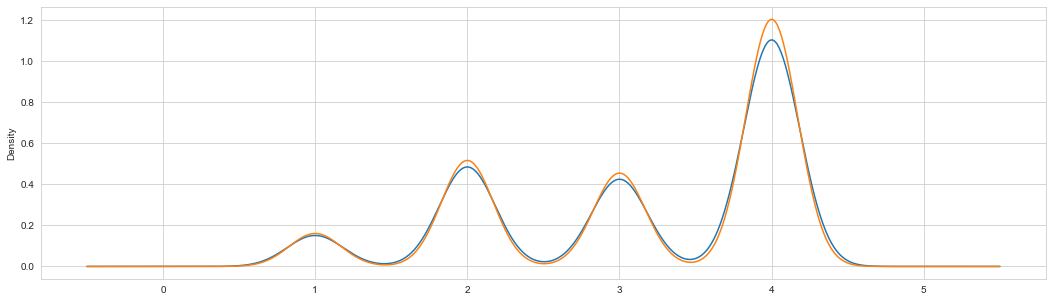

In [178]:
# Comparing distributions

fig = plt.figure(figsize = (18,5))
ax = plt.subplot(111)
sgot[sgot["SGOT"].notnull()]["Stage"].plot(kind = "kde", ax = ax)
temp[temp["SGOT"].notnull()]["Stage"].plot(kind = "kde", ax = ax)

In [179]:
# We will impute the remaining missing values with median as well in our datasets

train_df["SGOT"].fillna(train_df["SGOT"].median(), inplace = True)
test_df["SGOT"].fillna(test_df["SGOT"].median(), inplace = True)

### **Exploratory Data Analysis**

In [180]:
train_df

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7135,1654,CL,D-penicillamine,19581,F,N,N,Y,N,0.3,279.0,2.96,84.0,1500.80,99.43,109.0,293.0,10.2,4.0
1,7326,41,C,D-penicillamine,22880,F,Missing,N,Missing,N,0.3,312.0,2.96,68.0,1835.40,26.35,131.0,308.0,10.8,1.0
2,7254,297,D,Missing,27957,F,N,N,Missing,N,0.3,328.0,2.64,4.0,1562.05,88.52,116.0,194.0,10.3,3.0
3,3135,1872,C,D-penicillamine,21111,F,Missing,Y,Y,N,0.3,302.0,2.02,49.0,1562.05,26.35,128.0,285.0,10.5,4.0
4,2483,939,CL,D-penicillamine,18061,F,Missing,Missing,Missing,N,0.5,344.0,3.11,91.0,1562.05,104.56,128.0,306.0,11.4,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6795,4622,1762,C,Placebo,20909,M,Missing,N,Missing,N,0.9,360.0,2.43,68.0,3444.40,131.59,130.0,314.0,12.9,1.0
6796,4446,2955,C,Placebo,28650,F,Y,N,N,N,0.3,312.0,2.99,43.0,1562.05,88.52,238.0,399.0,10.6,4.0
6797,4082,584,C,Missing,24102,F,N,Y,Missing,N,0.3,218.0,2.79,68.0,1562.05,26.35,123.0,103.0,9.3,1.0
6798,2248,1426,CL,D-penicillamine,19791,F,N,Missing,Y,N,0.3,312.0,1.96,12.0,289.00,72.95,134.0,354.0,10.6,2.0


<AxesSubplot:>

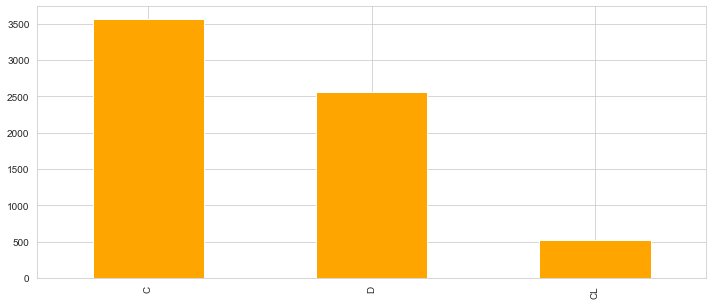

In [181]:
# Status
plt.figure(figsize=(12,5))
train_df["Status"].value_counts().plot(kind = "bar", color = "orange")

**Insights**
- We have **~3500 censored patients** ie he or she did not suffer the outcome of interest
- We have **~2500 patients who died because of cirhosis**
- Near ablut 500 patients are censored with liver desease

<AxesSubplot:xlabel='Status'>

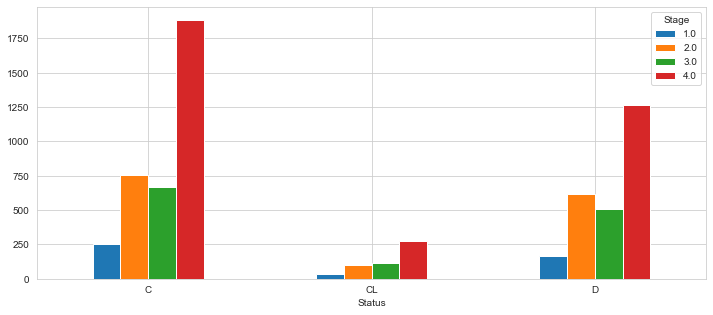

In [182]:
# In which stage deaths occured more?

res = pd.crosstab(index = train_df["Status"], columns = train_df["Stage"])
res.plot.bar(figsize =(12,5), rot = 0)

**Insights**
- People who **died more are from Stage 4** liver cirhosis followed by stage 2 patients which is quite strange. At a later We will deep dive into the other features of the stage 2 patients who died to see what caused their death.
- The number of **Stage 4 cirhosis patients tops in all three categories**.
- Coming to **CL** group, it has **least number of patients among all the stages** when compared to the censored and deaths.
- Censored group have highest stage 4 cirhosis patients than any other and touches approx **~1800**

<AxesSubplot:>

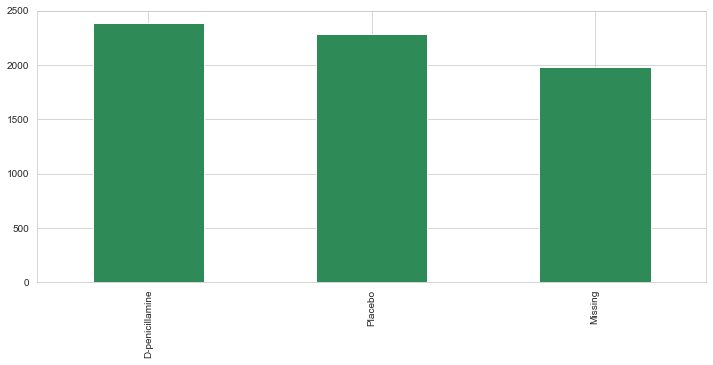

In [183]:
# What drug has been administered most to the patients?

train_df["Drug"].value_counts().plot(kind = "bar", figsize=(12,5), color = "seagreen")

**Insights**
- D-penicillamine has been administered the most to the patients.
- According to medical research studies, penicillamine treatment should not be given to patients with cirhosis in the early (stage 1 or 2) histological phase of the disease. Penicillamine treatment is recommended in patients once liver biopsy has demonstrated histological results typical of late stage 3 or 4 cirhosis which brings us to our next question of interest

<AxesSubplot:xlabel='Stage'>

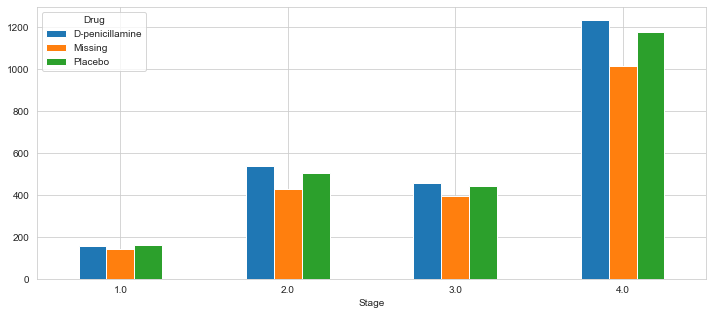

In [184]:
# Which stages patients D-penicillamine was mostly administered to?

res1 = pd.crosstab(index=train_df["Stage"], columns = train_df["Drug"])
res1.plot.bar(figsize=(12,5), rot = 0)

**Insights**
- **Stage 4 patients have been administered the most D-penicillamine**
- One unlikely thing is after stage 4, stage 2 patients were adinistered the next highest number of penicillamine which is strange and needs further examination.
- We have a feature of copper.Penicillamine is also given in patients with Wilsons Desease (having high amounts of copper in them). Lets examine stage 2 patients for their copper levels.

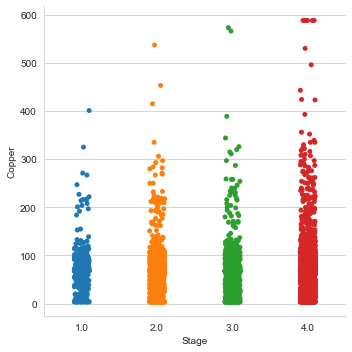

In [185]:
# Copper levels of Stage 2 patients

sns.catplot(x = "Stage", y = "Copper", data = train_df)

**Insights**
- **Stage 4 patients is showing the highest level of copper in their body while stage 1 has the least**
- Between stage 2 and stage 3, the above plot seems like there are slightly more people in stage 2 than stage 3. Also stage 3 should be the next highest rather than stage 2.Lets check further

In [186]:
# The normal range of copper in urine is 10 to 30 micrograms per 24 hours. Lets take it as a bench mark and count the no of people present above this range in each stages of liver crihosis

print("People above normal range in stage 1:",train_df[(train_df["Stage"] == 1) & (train_df["Copper"] > 30)]["ID"].count())
print("People above normal range in stage 2:",train_df[(train_df["Stage"] == 2) & (train_df["Copper"] > 30)]["ID"].count())
print("People above normal range in stage 3:",train_df[(train_df["Stage"] == 3) & (train_df["Copper"] > 30)]["ID"].count())
print("People above normal range in stage 4:",train_df[(train_df["Stage"] == 4) & (train_df["Copper"] > 30)]["ID"].count())

People above normal range in stage 1: 373
People above normal range in stage 2: 1215
People above normal range in stage 3: 1038
People above normal range in stage 4: 2760


- As you can see above, no of stage 2 patients whose copper level are higher than normal range are more than stage 3. This can be a reason for which D-penacillamine has been administered more to stage 2 patients than stage 3

<AxesSubplot:>

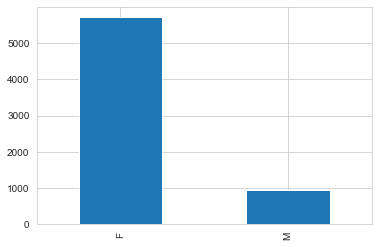

In [187]:
train_df["Sex"].value_counts().plot(kind = "bar")

- We have more females in our data than males. "Sex" column looks imbalanced. Lets see what we can do further about it.

<AxesSubplot:xlabel='Sex'>

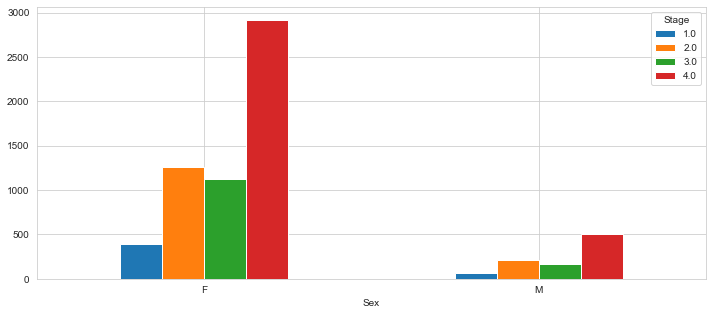

In [188]:
# Stages by gender

res2 = pd.crosstab(index = train_df["Sex"], columns = train_df["Stage"])
res2.plot.bar(figsize=(12,5), rot = 0)

- The data is imbalanced in terms of gender
- Females are more in all the stages compared to males

In [189]:
# Does people who are in later stages of cirhosis have ascites?

print("No of Stage 1 patients with no ascites",train_df[(train_df["Ascites"] == "N") & (train_df["Stage"] == 1)]["ID"].count())
print("No of Stage 2 patients with no ascites",train_df[(train_df["Ascites"] == "N") & (train_df["Stage"] == 2)]["ID"].count())
print("No of Stage 3 patients with no ascites",train_df[(train_df["Ascites"] == "N") & (train_df["Stage"] == 3)]["ID"].count())
print("No of Stage 4 patients with no ascites",train_df[(train_df["Ascites"] == "N") & (train_df["Stage"] == 4)]["ID"].count())

print("-----------------------------------------------------------------------------------------------------")

print("No of Stage 1 patients with ascites",train_df[(train_df["Ascites"] == "Y") & (train_df["Stage"] == 1)]["ID"].count())
print("No of Stage 2 patients with ascites",train_df[(train_df["Ascites"] == "Y") & (train_df["Stage"] == 2)]["ID"].count())
print("No of Stage 3 patients with ascites",train_df[(train_df["Ascites"] == "Y") & (train_df["Stage"] == 3)]["ID"].count())
print("No of Stage 4 patients with ascites",train_df[(train_df["Ascites"] == "Y") & (train_df["Stage"] == 4)]["ID"].count())



No of Stage 1 patients with no ascites 251
No of Stage 2 patients with no ascites 844
No of Stage 3 patients with no ascites 741
No of Stage 4 patients with no ascites 2041
-----------------------------------------------------------------------------------------------------
No of Stage 1 patients with ascites 41
No of Stage 2 patients with ascites 123
No of Stage 3 patients with ascites 129
No of Stage 4 patients with ascites 272


- Ascites is a condition of accumulation of fluid. The causes of ascites can be congestive heart failure, advanced kidney failure or later stage cirhosis.
- Among people having ascites, Stage 3 and stage 4 patients are more in number.
- However, there are even higher number of patients who have liver deasease but do not have ascites. They may have other underlying conditions like kidney or heart problems

### Feature Engineering - Things to do
- Change the age column to get the years
- encode categorical variables - label encoding for Stage and rest pd.get_dummies will do
- Standardize the values using some scaler


In [190]:
train_df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7135,1654,CL,D-penicillamine,19581,F,N,N,Y,N,0.3,279.0,2.96,84.0,1500.80,99.43,109.0,293.0,10.2,4.0
1,7326,41,C,D-penicillamine,22880,F,Missing,N,Missing,N,0.3,312.0,2.96,68.0,1835.40,26.35,131.0,308.0,10.8,1.0
2,7254,297,D,Missing,27957,F,N,N,Missing,N,0.3,328.0,2.64,4.0,1562.05,88.52,116.0,194.0,10.3,3.0
3,3135,1872,C,D-penicillamine,21111,F,Missing,Y,Y,N,0.3,302.0,2.02,49.0,1562.05,26.35,128.0,285.0,10.5,4.0
4,2483,939,CL,D-penicillamine,18061,F,Missing,Missing,Missing,N,0.5,344.0,3.11,91.0,1562.05,104.56,128.0,306.0,11.4,2.0


In [191]:
# changing the age column to years

train_df["Age"] = train_df["Age"]//365
test_df["Age"] = test_df["Age"]//365

In [192]:
# separating features and target columns
x = train_df.iloc[:,1:19]
y = train_df.iloc[:,-1]

In [193]:
print(x.shape)
print(y.shape)

(6645, 18)
(6645,)


In [194]:
# Encoding categorical variables

x = pd.get_dummies(data = x, drop_first=True)

In [195]:
# Encoding target variable with label encoder 

le = LabelEncoder()
y = le.fit_transform(y)


In [196]:
x

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,...,Drug_Placebo,Sex_M,Ascites_N,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_S,Edema_Y
0,1654,53,0.3,279.0,2.96,84.0,1500.80,99.43,109.0,293.0,...,0,0,1,0,1,0,0,1,0,0
1,41,62,0.3,312.0,2.96,68.0,1835.40,26.35,131.0,308.0,...,0,0,0,0,1,0,0,0,0,0
2,297,76,0.3,328.0,2.64,4.0,1562.05,88.52,116.0,194.0,...,0,0,1,0,1,0,0,0,0,0
3,1872,57,0.3,302.0,2.02,49.0,1562.05,26.35,128.0,285.0,...,0,0,0,0,0,1,0,1,0,0
4,939,49,0.5,344.0,3.11,91.0,1562.05,104.56,128.0,306.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6795,1762,57,0.9,360.0,2.43,68.0,3444.40,131.59,130.0,314.0,...,1,1,0,0,1,0,0,0,0,0
6796,2955,78,0.3,312.0,2.99,43.0,1562.05,88.52,238.0,399.0,...,1,0,0,1,1,0,1,0,0,0
6797,584,66,0.3,218.0,2.79,68.0,1562.05,26.35,123.0,103.0,...,0,0,1,0,0,1,0,0,0,0
6798,1426,54,0.3,312.0,1.96,12.0,289.00,72.95,134.0,354.0,...,0,0,1,0,0,0,0,1,0,0


In [197]:
# separating the train and test data 

features = x.drop(["N_Days"], axis = 1)
target = y

In [198]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=7, stratify=np.array(target))

In [199]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5316, 23)
(1329, 23)
(5316,)
(1329,)


### Building our first model:

- Naive Bayes Model

In [200]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

gnb = GaussianNB().fit(x_train, y_train)
gnb_predictions = gnb.predict(x_test)

# accuracy on x_test

accuracy = gnb.score(x_test, y_test)
print(accuracy)

# creating a confusion matrix
cm = confusion_matrix(y_test, gnb_predictions)

0.48758465011286684


In [201]:
from sklearn.metrics import classification_report
print(classification_report(y_test, gnb_predictions))

              precision    recall  f1-score   support

           0       0.12      0.01      0.02        91
           1       0.22      0.02      0.04       294
           2       0.28      0.12      0.17       259
           3       0.52      0.89      0.65       685

    accuracy                           0.49      1329
   macro avg       0.28      0.26      0.22      1329
weighted avg       0.38      0.49      0.38      1329

